# Load Packages

In [1]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("All packages loaded successfully!")

All packages loaded successfully!


In [2]:
import os
import kagglehub
from dotenv import load_dotenv

load_dotenv()

True

# Load Data

In [6]:
dataset_path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")
csv_file_path = os.path.join(dataset_path, 'healthcare-dataset-stroke-data.csv')

s_df = pd.read_csv(csv_file_path)
print(f"Dataset shape: {s_df.shape}")
s_df.head()

Dataset shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Initial Prep

In [7]:
s_df = s_df.set_index('id')
s_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
s_df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [9]:
s_df['gender'] = np.where(
    s_df['gender'] == 'Other',
    'Female',
    s_df['gender']
)
s_df['gender'].value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

In [20]:
s_df['hypertension'] = s_df['hypertension'].replace({0: 'No', 1: 'Yes'})
s_df['heart_disease'] = s_df['heart_disease'].replace({0: 'No', 1: 'Yes'})

# EDA

## Dataset Overview

In [21]:
# Data types and info
print("Data Types and Info:")
s_df.info()


Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 479.1+ KB


In [22]:
# Missing values check
print("Missing Values Check:")
missing_values = s_df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print("Missing values found:")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(s_df)) * 100
        print(f"  {col}: {missing_count:,} ({percentage:.2f}%)")

Missing Values Check:
Missing values found:
  bmi: 201 (3.93%)


In [23]:
# Descriptive statistics
print("Descriptive Statistics:")
display(s_df.describe(include='all').round(2))

Descriptive Statistics:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110,5110,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,2,NaN,2,2,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,No,No,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2995,NaN,4612,4834,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,NaN,NaN,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,NaN,NaN,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,NaN,NaN,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,NaN,NaN,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,NaN,NaN,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,NaN,NaN,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [24]:
# Check for duplicates and list columns
duplicate_count = s_df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("Warning: Duplicate rows found!")
else:
    print("No duplicate rows found!")

print()
print("Column Names:")
for i, col in enumerate(s_df.columns, 1):
    print(f"{i:2d}. {col}")

Duplicate rows: 0
No duplicate rows found!

Column Names:
 1. gender
 2. age
 3. hypertension
 4. heart_disease
 5. ever_married
 6. work_type
 7. Residence_type
 8. avg_glucose_level
 9. bmi
10. smoking_status
11. stroke


## Target Variable Analysis

In [25]:
target_col = 'stroke'

print(f"Target Variable: {target_col}")

Target Variable: stroke


In [26]:
# Target variable value counts and class balance
if target_col and target_col in s_df.columns:
    target_counts = s_df[target_col].value_counts().sort_index()
    print("Value Counts:")
    for value, count in target_counts.items():
        percentage = (count / len(s_df)) * 100
        print(f"  {value}: {count:,} ({percentage:.1f}%)")
    
    # Class imbalance ratio
    if len(target_counts) == 2:
        minority_class = target_counts.min()
        majority_class = target_counts.max()
        imbalance_ratio = majority_class / minority_class
        print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
        
        if imbalance_ratio > 1.5:
            print("Dataset shows class imbalance - consider balancing techniques")
        else:
            print("Dataset is relatively balanced")
else:
    print("Target column not found. Available columns:")
    print(list(s_df.columns))


Value Counts:
  0: 4,861 (95.1%)
  1: 249 (4.9%)

Class Imbalance Ratio: 19.52:1
Dataset shows class imbalance - consider balancing techniques


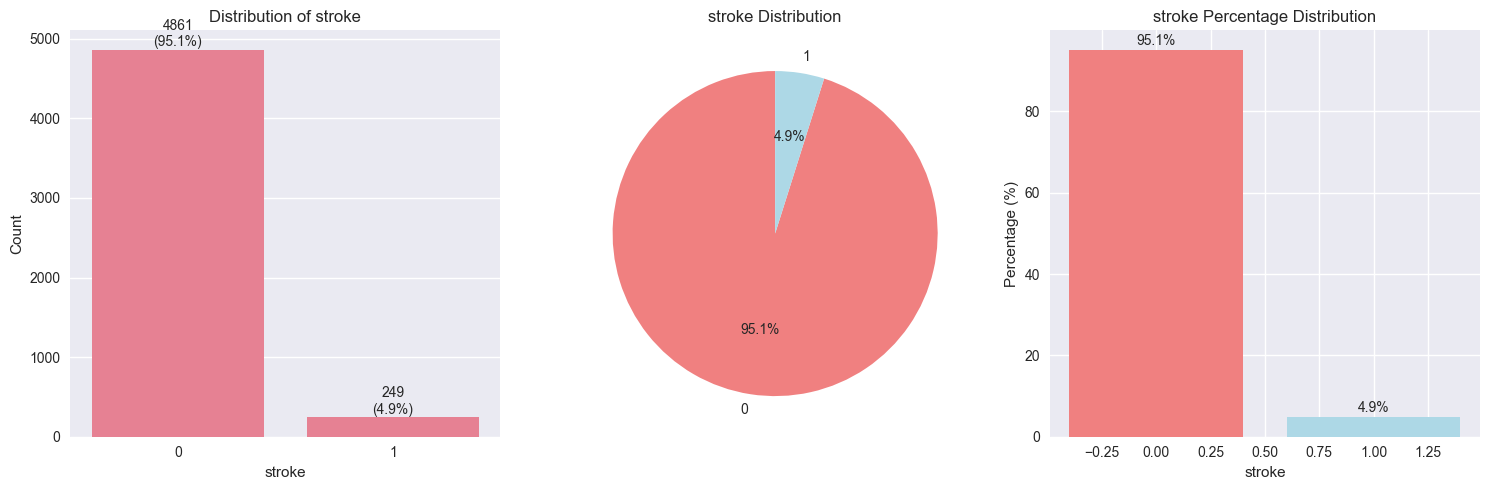

In [27]:
# Target variable visualizations
if target_col and target_col in s_df.columns:
    target_counts = s_df[target_col].value_counts().sort_index()
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Count plot
    sns.countplot(data=s_df, x=target_col, ax=axes[0])
    axes[0].set_title(f'Distribution of {target_col}')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Count')
    
    # Add count labels on bars
    for i, patch in enumerate(axes[0].patches):
        height = patch.get_height()
        axes[0].text(patch.get_x() + patch.get_width()/2., height + 5,
                    f'{int(height)}\n({height/len(s_df)*100:.1f}%)', 
                    ha='center', va='bottom')
    
    # Pie chart
    colors = ['lightcoral', 'lightblue']
    axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
    axes[1].set_title(f'{target_col} Distribution')
    
    # Bar plot with percentages
    target_pct = s_df[target_col].value_counts(normalize=True).sort_index() * 100
    bars = axes[2].bar(target_pct.index, target_pct.values, color=['lightcoral', 'lightblue'])
    axes[2].set_title(f'{target_col} Percentage Distribution')
    axes[2].set_xlabel(target_col)
    axes[2].set_ylabel('Percentage (%)')
    
    # Add percentage labels on bars
    for bar, pct in zip(bars, target_pct.values):
        axes[2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                    f'{pct:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

## Numerical Features Analysis

In [28]:
# Identify numerical columns
numerical_cols = s_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target variable from numerical analysis if it's numerical
if target_col and target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"Numerical Features ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"{i:2d}. {col}")
    
print(f"\nTotal numerical features to analyze: {len(numerical_cols)}")

Numerical Features (3):
 1. age
 2. avg_glucose_level
 3. bmi

Total numerical features to analyze: 3


In [29]:
# Descriptive statistics for numerical features
if len(numerical_cols) > 0:
    print("Descriptive Statistics for Numerical Features:")
    numerical_stats = s_df[numerical_cols].describe().round(2)
    display(numerical_stats)
    
    print("\nAdditional Statistics:")
    additional_stats = pd.DataFrame({
        'Feature': numerical_cols,
        'Skewness': [s_df[col].skew() for col in numerical_cols],
        'Kurtosis': [s_df[col].kurtosis() for col in numerical_cols],
        'Unique_Values': [s_df[col].nunique() for col in numerical_cols],
        'Zero_Count': [(s_df[col] == 0).sum() for col in numerical_cols]
    }).round(3)
    display(additional_stats)
else:
    print("No numerical features found in the dataset.")


Descriptive Statistics for Numerical Features:


,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60



Additional Statistics:


,Feature,Skewness,Kurtosis,Unique_Values,Zero_Count
0,age,-0.137,-0.991,104,0
1,avg_glucose_level,1.572,1.680,3979,0
2,bmi,1.055,3.363,418,0


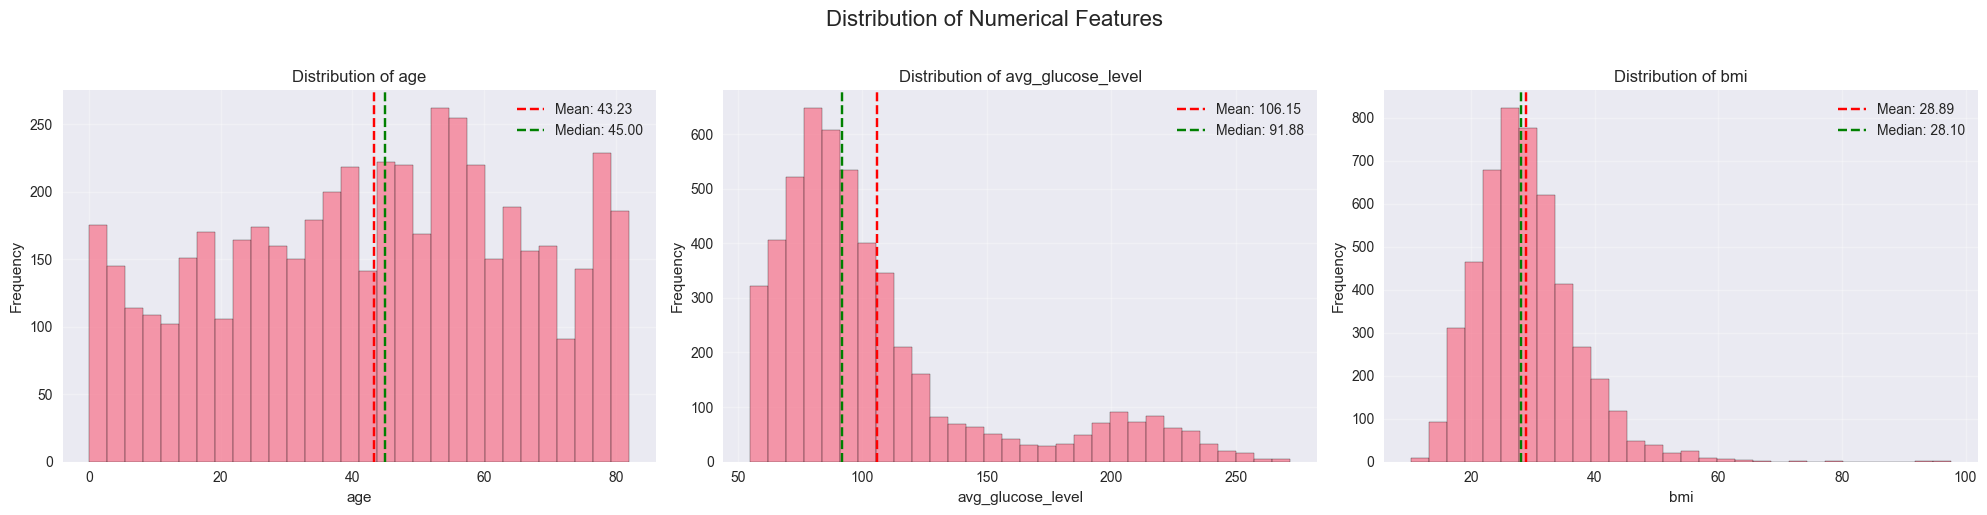

In [30]:
# Histograms for numerical features
if len(numerical_cols) > 0:
    n_cols = min(4, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if len(numerical_cols) == 1:
        axes = axes.reshape(1, 1)
        
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            axes[i].hist(s_df[col], bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
            
            # Add mean and median lines
            mean_val = s_df[col].mean()
            median_val = s_df[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
            axes[i].legend()
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
        
    plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


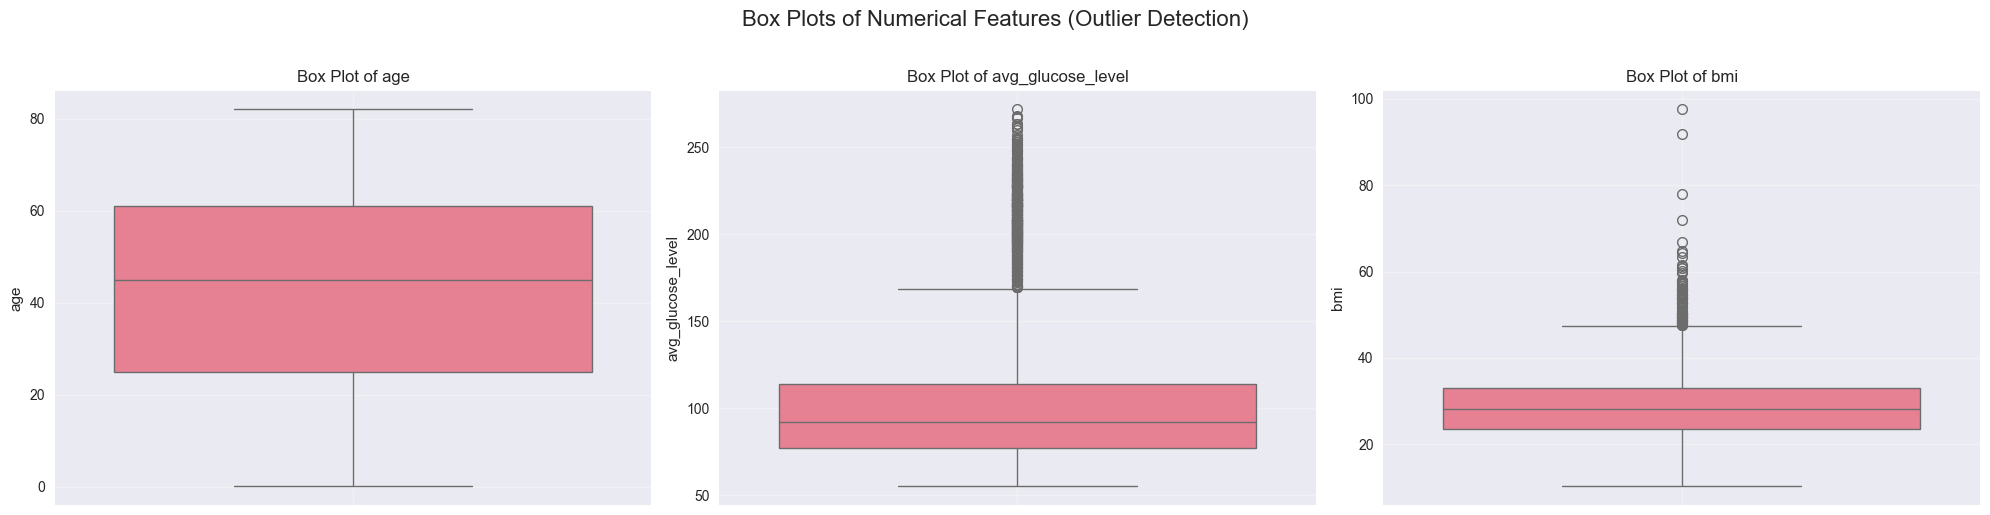

In [31]:
# Box plots for numerical features (outlier detection)
if len(numerical_cols) > 0:
    n_cols = min(4, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if len(numerical_cols) == 1:
        axes = axes.reshape(1, 1)
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.boxplot(y=s_df[col], ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
        
    plt.suptitle('Box Plots of Numerical Features (Outlier Detection)', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


## Categorical Features Analysis

In [32]:
# Identify categorical columns (non-numeric or low cardinality numeric)
categorical_cols = []

for col in s_df.columns:
    if col != target_col:
        if s_df[col].dtype == 'object' or s_df[col].nunique() <= 10:
            categorical_cols.append(col)

print(f"Categorical Features ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    unique_count = s_df[col].nunique()
    print(f"{i:2d}. {col} (unique values: {unique_count})")
    
print(f"\nTotal categorical features to analyze: {len(categorical_cols)}")

Categorical Features (7):
 1. gender (unique values: 2)
 2. hypertension (unique values: 2)
 3. heart_disease (unique values: 2)
 4. ever_married (unique values: 2)
 5. work_type (unique values: 5)
 6. Residence_type (unique values: 2)
 7. smoking_status (unique values: 4)

Total categorical features to analyze: 7


In [33]:
# Value counts for categorical features
if len(categorical_cols) > 0:
    print("Value Counts for Categorical Features:")
    for col in categorical_cols:
        print(f"\n{col}:")
        value_counts = s_df[col].value_counts().head(10)  # Show top 10 categories
        for value, count in value_counts.items():
            percentage = (count / len(s_df)) * 100
            print(f"  {value}: {count:,} ({percentage:.1f}%)")
        
        # Show if there are more categories
        if s_df[col].nunique() > 10:
            remaining = s_df[col].nunique() - 10
            print(f"  ... and {remaining} more categories")
else:
    print("No categorical features found in the dataset.")

Value Counts for Categorical Features:

gender:
  Female: 2,995 (58.6%)
  Male: 2,115 (41.4%)

hypertension:
  No: 4,612 (90.3%)
  Yes: 498 (9.7%)

heart_disease:
  No: 4,834 (94.6%)
  Yes: 276 (5.4%)

ever_married:
  Yes: 3,353 (65.6%)
  No: 1,757 (34.4%)

work_type:
  Private: 2,925 (57.2%)
  Self-employed: 819 (16.0%)
  children: 687 (13.4%)
  Govt_job: 657 (12.9%)
  Never_worked: 22 (0.4%)

Residence_type:
  Urban: 2,596 (50.8%)
  Rural: 2,514 (49.2%)

smoking_status:
  never smoked: 1,892 (37.0%)
  Unknown: 1,544 (30.2%)
  formerly smoked: 885 (17.3%)
  smokes: 789 (15.4%)


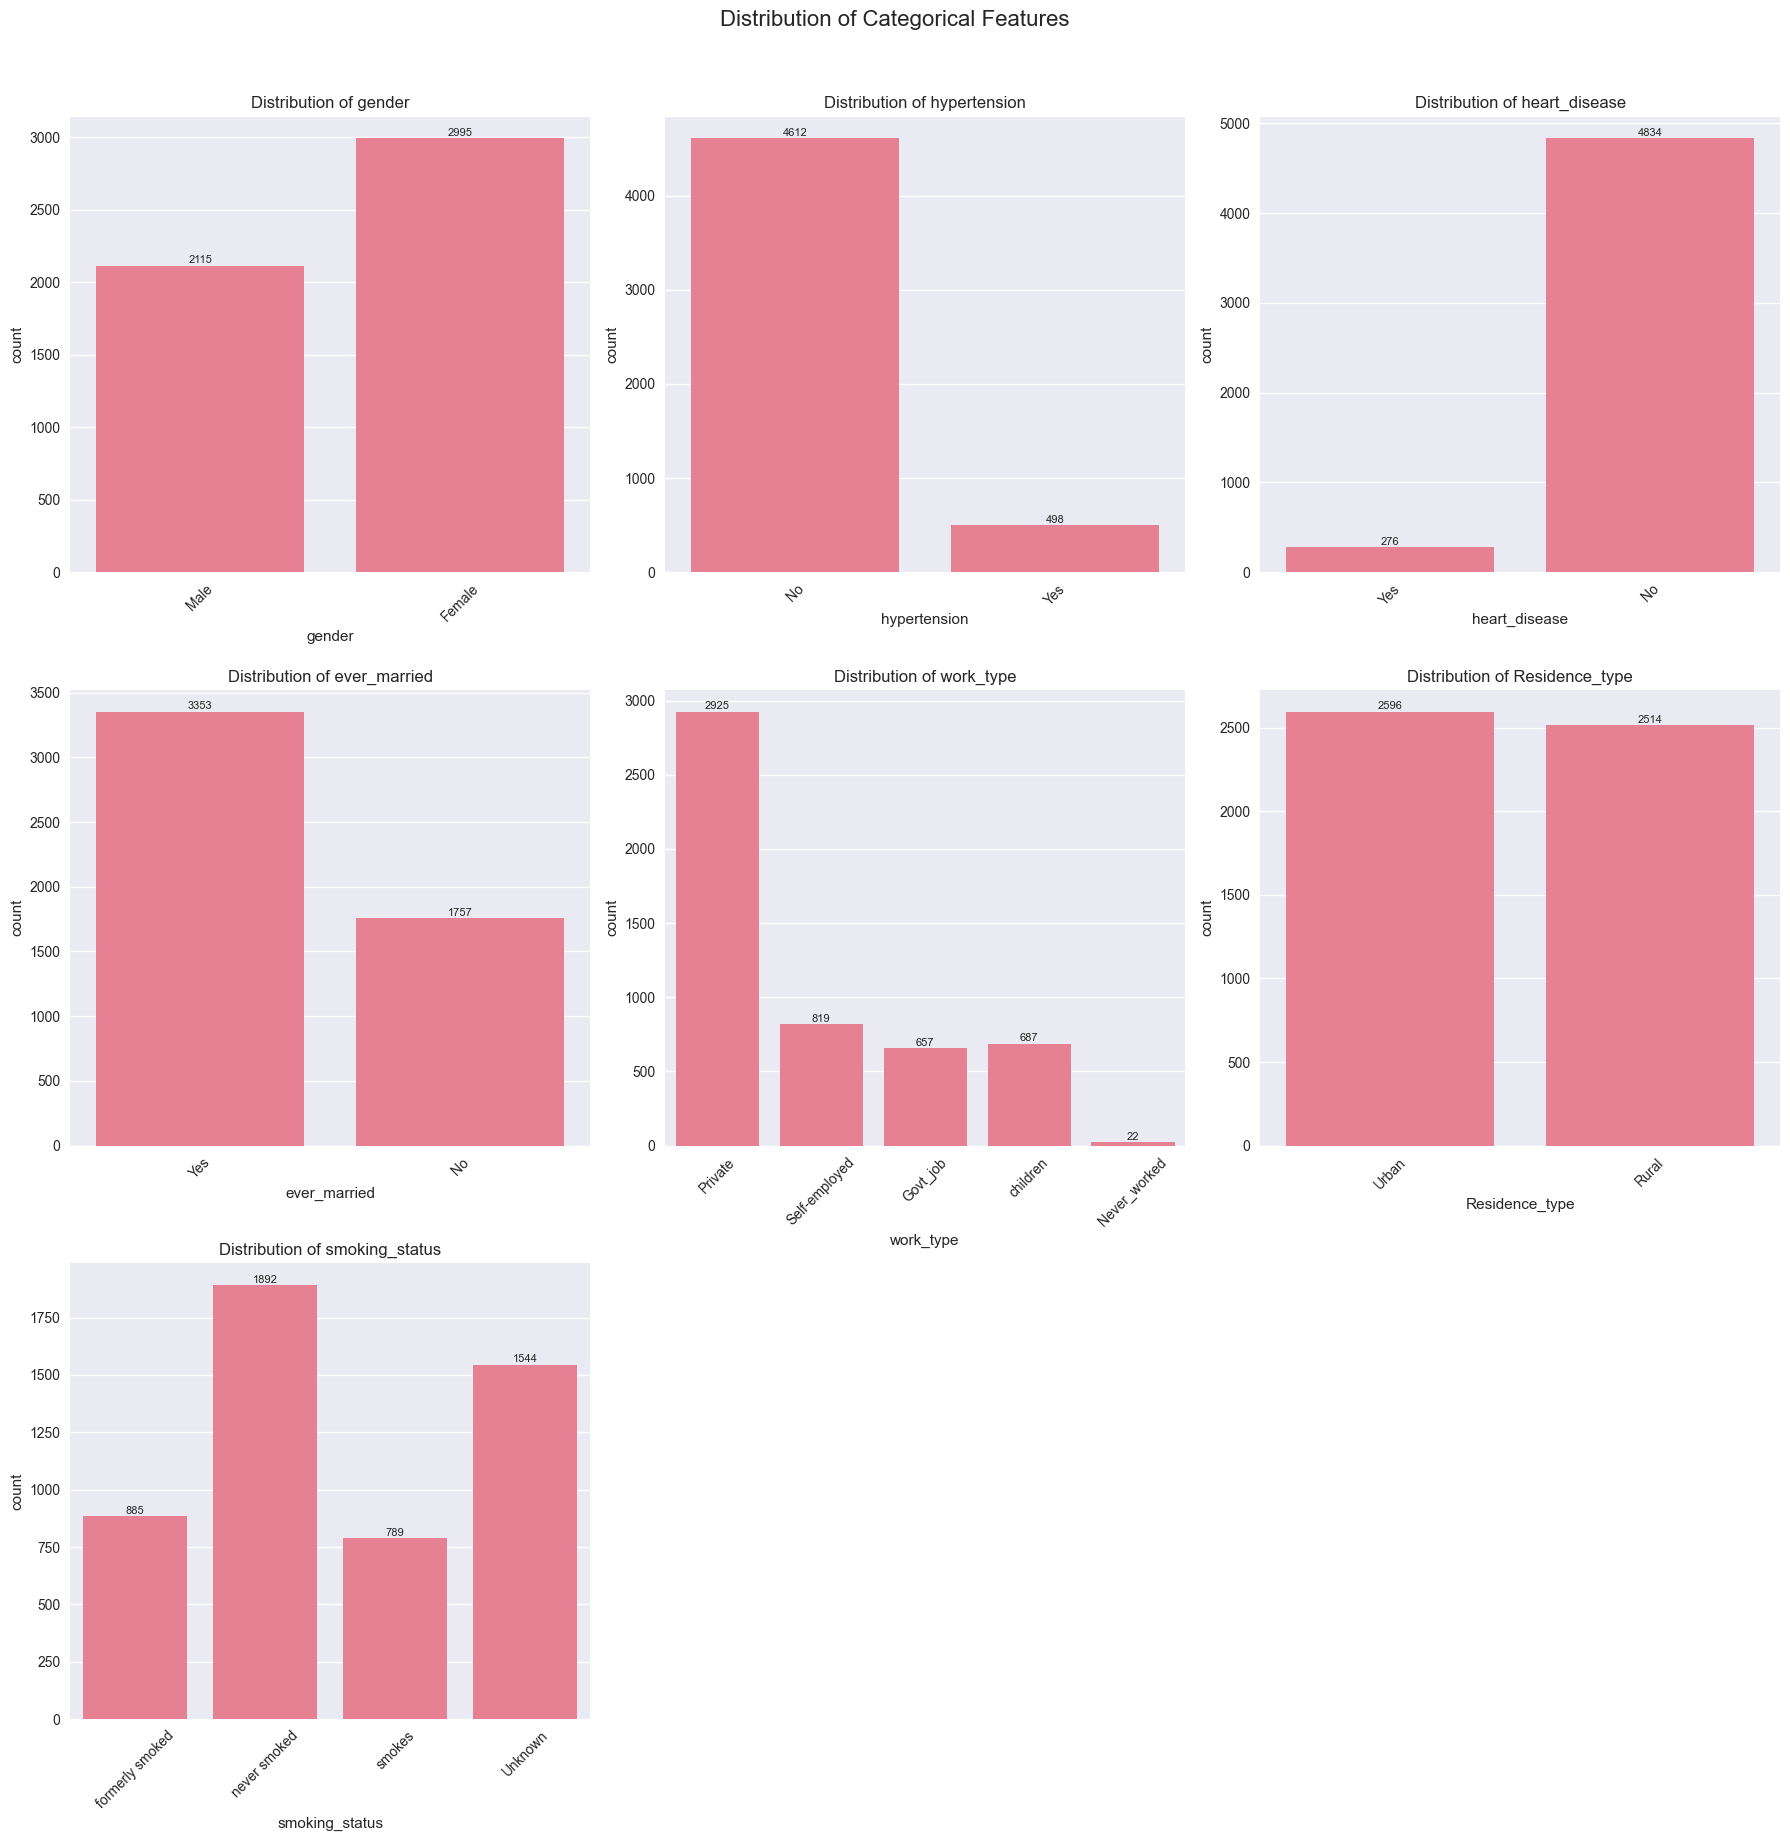

In [34]:
# Count plots for categorical features
if len(categorical_cols) > 0:
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if len(categorical_cols) == 1:
        axes = axes.reshape(1, 1)
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        if i < len(axes):
            # For high cardinality features, show only top categories
            if s_df[col].nunique() > 15:
                top_cats = s_df[col].value_counts().head(10).index
                data_subset = s_df[s_df[col].isin(top_cats)]
                sns.countplot(data=data_subset, x=col, ax=axes[i], order=top_cats)
                axes[i].set_title(f'Top 10 Categories in {col}')
            else:
                sns.countplot(data=s_df, x=col, ax=axes[i])
                axes[i].set_title(f'Distribution of {col}')
                
            axes[i].tick_params(axis='x', rotation=45)
            
            # Add count labels on bars (for reasonable number of bars)
            if len(axes[i].patches) <= 15:
                for patch in axes[i].patches:
                    height = patch.get_height()
                    if height > 0:
                        axes[i].text(patch.get_x() + patch.get_width()/2., height + 2,
                                    f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # Hide empty subplots
    for i in range(len(categorical_cols), len(axes)):
        axes[i].set_visible(False)
        
    plt.suptitle('Distribution of Categorical Features', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

In [35]:
# Cross-tabulation with target variable
if len(categorical_cols) > 0 and target_col and target_col in s_df.columns:
    print(f"Cross-tabulation with Target Variable ({target_col}):")
    
    for col in categorical_cols[:5]:  # Show first 5 to avoid too much output
        print(f"\n{col} vs {target_col}:")
        
        # For high cardinality features, show only top categories
        if s_df[col].nunique() > 10:
            top_cats = s_df[col].value_counts().head(5).index
            data_subset = s_df[s_df[col].isin(top_cats)]
            crosstab = pd.crosstab(data_subset[col], data_subset[target_col], margins=True)
            print("Counts (Top 5 categories):")
        else:
            crosstab = pd.crosstab(s_df[col], s_df[target_col], margins=True)
            print("Counts:")
            
        display(crosstab)
        
        # Percentage cross-tabulation
        if s_df[col].nunique() <= 10:
            crosstab_pct = pd.crosstab(s_df[col], s_df[target_col], 
                                     normalize='columns') * 100
            print("Percentages by Target Class:")
            display(crosstab_pct.round(1))
        print("-" * 40)
    
    # Show note if more categorical features exist
    if len(categorical_cols) > 5:
        print(f"\nNote: Showing cross-tabulation for first 5 categorical features.")
        print(f"Remaining features: {', '.join(categorical_cols[5:])}")

Cross-tabulation with Target Variable (stroke):

gender vs stroke:
Counts:


stroke,0,1,All
gender,,,
Female,2854,141,2995
Male,2007,108,2115
All,4861,249,5110


Percentages by Target Class:


stroke,0,1
gender,,
Female,58.7,56.6
Male,41.3,43.4


----------------------------------------

hypertension vs stroke:
Counts:


stroke,0,1,All
hypertension,,,
No,4429,183,4612
Yes,432,66,498
All,4861,249,5110


Percentages by Target Class:


stroke,0,1
hypertension,,
No,91.1,73.5
Yes,8.9,26.5


----------------------------------------

heart_disease vs stroke:
Counts:


stroke,0,1,All
heart_disease,,,
No,4632,202,4834
Yes,229,47,276
All,4861,249,5110


Percentages by Target Class:


stroke,0,1
heart_disease,,
No,95.3,81.1
Yes,4.7,18.9


----------------------------------------

ever_married vs stroke:
Counts:


stroke,0,1,All
ever_married,,,
No,1728,29,1757
Yes,3133,220,3353
All,4861,249,5110


Percentages by Target Class:


stroke,0,1
ever_married,,
No,35.5,11.6
Yes,64.5,88.4


----------------------------------------

work_type vs stroke:
Counts:


stroke,0,1,All
work_type,,,
Govt_job,624,33,657
Never_worked,22,0,22
Private,2776,149,2925
Self-employed,754,65,819
children,685,2,687
All,4861,249,5110


Percentages by Target Class:


stroke,0,1
work_type,,
Govt_job,12.8,13.3
Never_worked,0.5,0.0
Private,57.1,59.8
Self-employed,15.5,26.1
children,14.1,0.8


----------------------------------------

Note: Showing cross-tabulation for first 5 categorical features.
Remaining features: Residence_type, smoking_status


## Correlation Analysis

In [36]:
numerical_cols_for_corr = s_df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols_for_corr) > 1:
    print(f"Found {len(numerical_cols_for_corr)} numerical features for correlation analysis")
    print("Features:", numerical_cols_for_corr)
else:
    print("Need at least 2 numerical features for correlation analysis.")
    print(f"Found {len(numerical_cols_for_corr)} numerical features: {numerical_cols_for_corr}")


Found 4 numerical features for correlation analysis
Features: ['age', 'avg_glucose_level', 'bmi', 'stroke']


In [37]:
# Calculate correlation matrix and display
if len(numerical_cols_for_corr) > 1:
    correlation_matrix = s_df[numerical_cols_for_corr].corr()
    
    print(f"Correlation Matrix for {len(numerical_cols_for_corr)} numerical features:")
    display(correlation_matrix.round(3))
    
    # Find highly correlated pairs
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    high_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value)
                high_corr_pairs.append(pair)
    
    if high_corr_pairs:
        for pair in high_corr_pairs:
            print(f"  - {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
        print("\nConsider removing one feature from highly correlated pairs to reduce multicollinearity.")
    else:
        print("  No highly correlated feature pairs found.")

Correlation Matrix for 4 numerical features:


,age,avg_glucose_level,bmi,stroke
age,1.000,0.238,0.333,0.245
avg_glucose_level,0.238,1.000,0.176,0.132
bmi,0.333,0.176,1.000,0.042
stroke,0.245,0.132,0.042,1.000



Highly Correlated Feature Pairs (|correlation| > 0.7):
  No highly correlated feature pairs found.


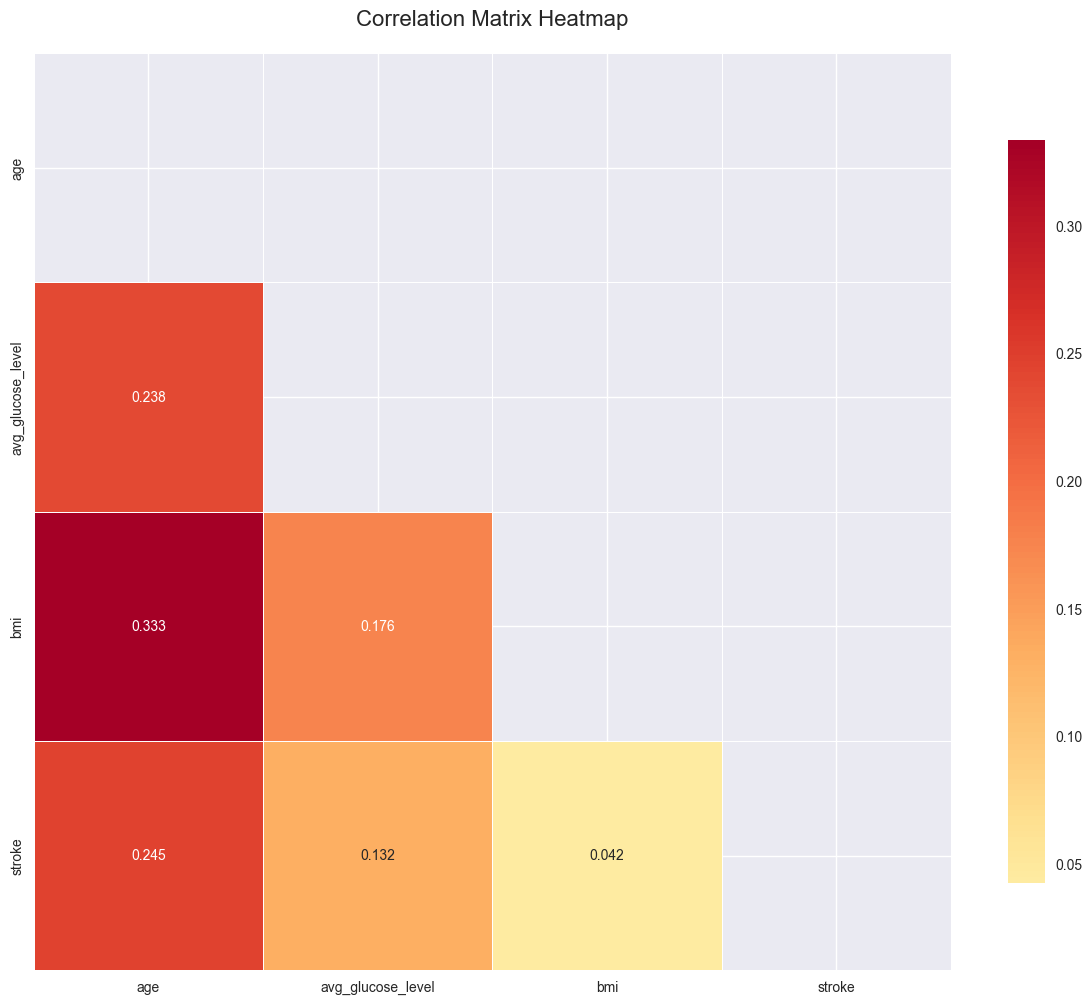

In [38]:
# Correlation heatmap visualization
if len(numerical_cols_for_corr) > 1:
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                linewidths=0.5,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    
    plt.title('Correlation Matrix Heatmap', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

Correlation with Target Variable (stroke):
Features sorted by absolute correlation with target:
  - age: 0.245 (Weak Positive)
  - avg_glucose_level: 0.132 (Weak Positive)
  - bmi: 0.042 (Weak Positive)


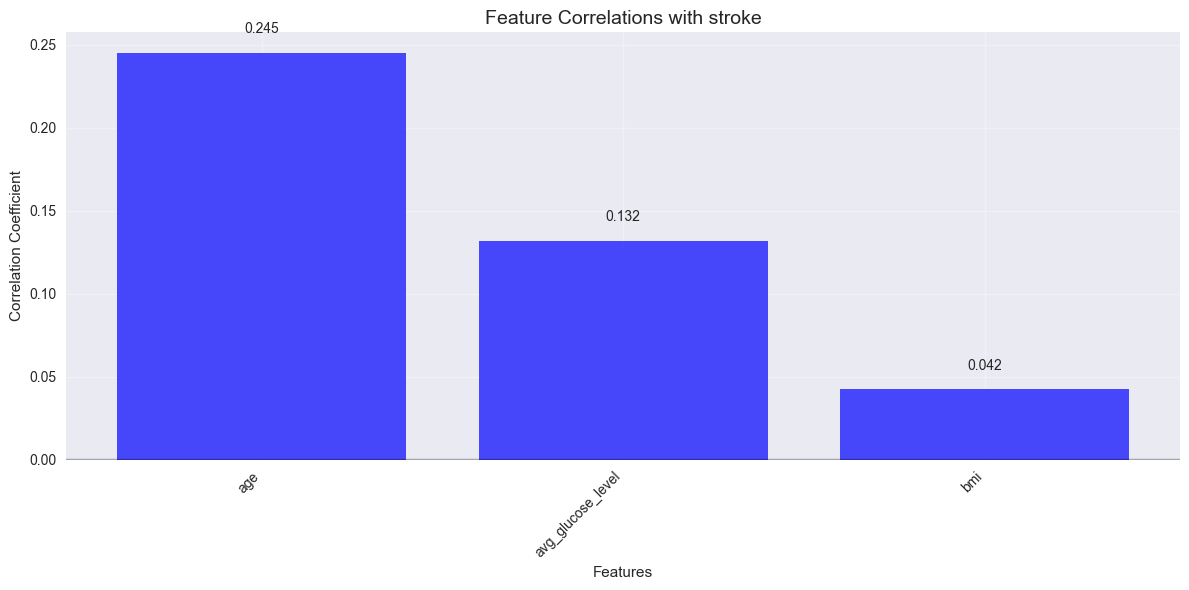

In [39]:
# Correlation with target variable
if len(numerical_cols_for_corr) > 1:
    # Check if target is numerical
    if target_col and target_col in numerical_cols_for_corr:
        print(f"Correlation with Target Variable ({target_col}):")
        target_correlations = correlation_matrix[target_col].drop(target_col).sort_values(
            key=abs, ascending=False)
        
        print("Features sorted by absolute correlation with target:")
        for feature, corr in target_correlations.items():
            strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
            direction = "Positive" if corr > 0 else "Negative"
            print(f"  - {feature}: {corr:.3f} ({strength} {direction})")
        
        # Bar plot of correlations with target
        plt.figure(figsize=(12, 6))
        colors = ['red' if x < 0 else 'blue' for x in target_correlations.values]
        bars = plt.bar(range(len(target_correlations)), target_correlations.values, color=colors, alpha=0.7)
        
        plt.title(f'Feature Correlations with {target_col}', fontsize=14)
        plt.xlabel('Features')
        plt.ylabel('Correlation Coefficient')
        plt.xticks(range(len(target_correlations)), target_correlations.index, rotation=45, ha='right')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.grid(True, alpha=0.3)
        
        # Add correlation values on bars
        for i, (bar, corr) in enumerate(zip(bars, target_correlations.values)):
            plt.text(bar.get_x() + bar.get_width()/2., 
                    corr + (0.01 if corr > 0 else -0.01),
                    f'{corr:.3f}', ha='center', va='bottom' if corr > 0 else 'top')
        
        plt.tight_layout()
        plt.show()
    
    elif target_col and target_col not in numerical_cols_for_corr:
        print(f"Note: Target variable '{target_col}' is categorical.")
        print("Use chi-square tests and Cramer's V for association analysis with categorical features.")

## Feature-Target Relationships

In [41]:
if target_col and target_col in s_df.columns:
    print(f"Analyzing relationships between features and {target_col}")
    
    # Separate numerical and categorical features
    all_features = [col for col in s_df.columns if col != target_col]
    numerical_features = [col for col in all_features if s_df[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in all_features if col not in numerical_features]
    
    print(f"Numerical features: {len(numerical_features)}")
    print(f"Categorical features: {len(categorical_features)}")
else:
    print(f"Target column '{target_col}' not found in dataset.")
    print("Available columns:", list(s_df.columns))

Analyzing relationships between features and stroke
Numerical features: 3
Categorical features: 7


NUMERICAL FEATURES vs TARGET:


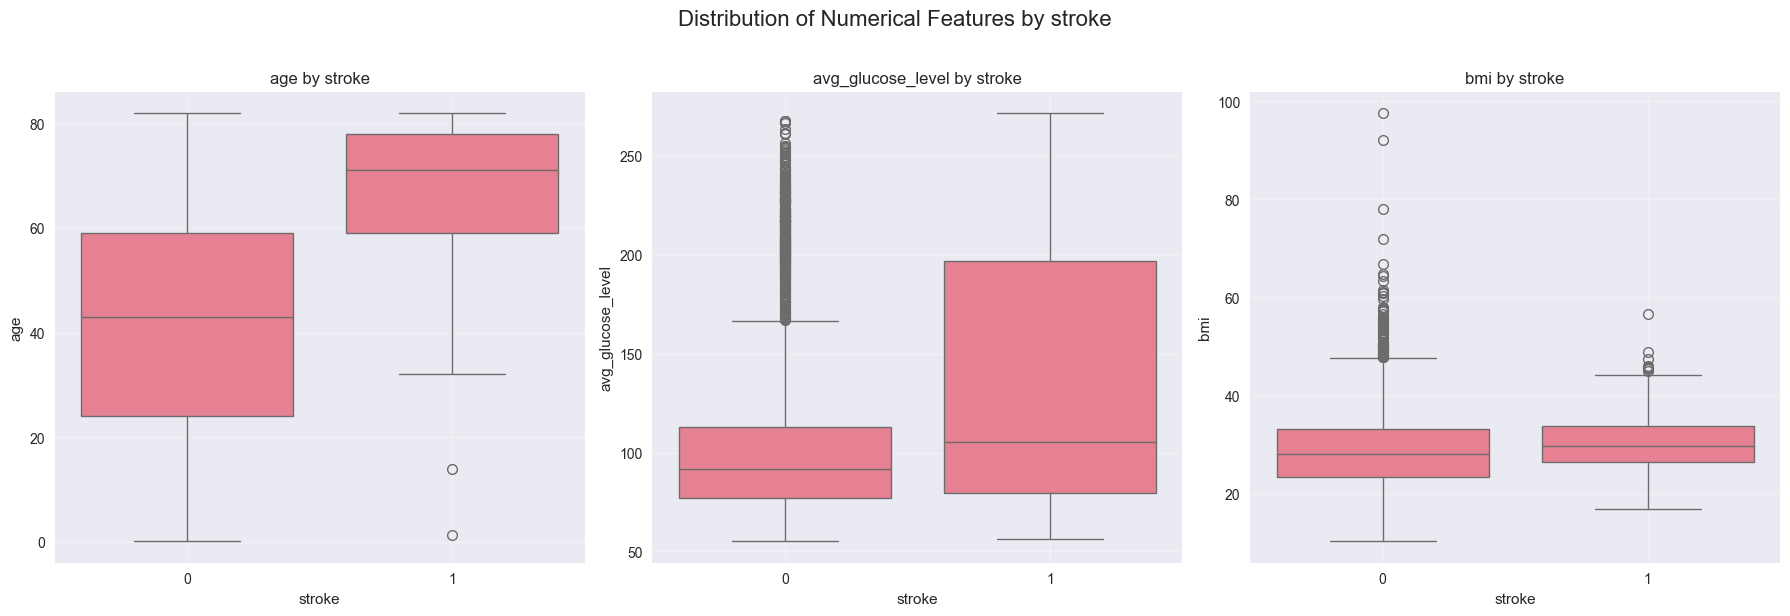

In [42]:
# Box plots for numerical features by target class
if target_col and target_col in s_df.columns and 'numerical_features' in locals():
    if numerical_features:
        print("NUMERICAL FEATURES vs TARGET:")
        
        n_cols = min(3, len(numerical_features))
        n_rows = (len(numerical_features) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        if len(numerical_features) == 1:
            axes = axes.reshape(1, 1)
        axes = axes.flatten()
        
        for i, feature in enumerate(numerical_features):
            if i < len(axes):
                sns.boxplot(data=s_df, x=target_col, y=feature, ax=axes[i])
                axes[i].set_title(f'{feature} by {target_col}')
                axes[i].grid(True, alpha=0.3)
        
        # Hide empty subplots
        for i in range(len(numerical_features), len(axes)):
            axes[i].set_visible(False)
            
        plt.suptitle(f'Distribution of Numerical Features by {target_col}', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

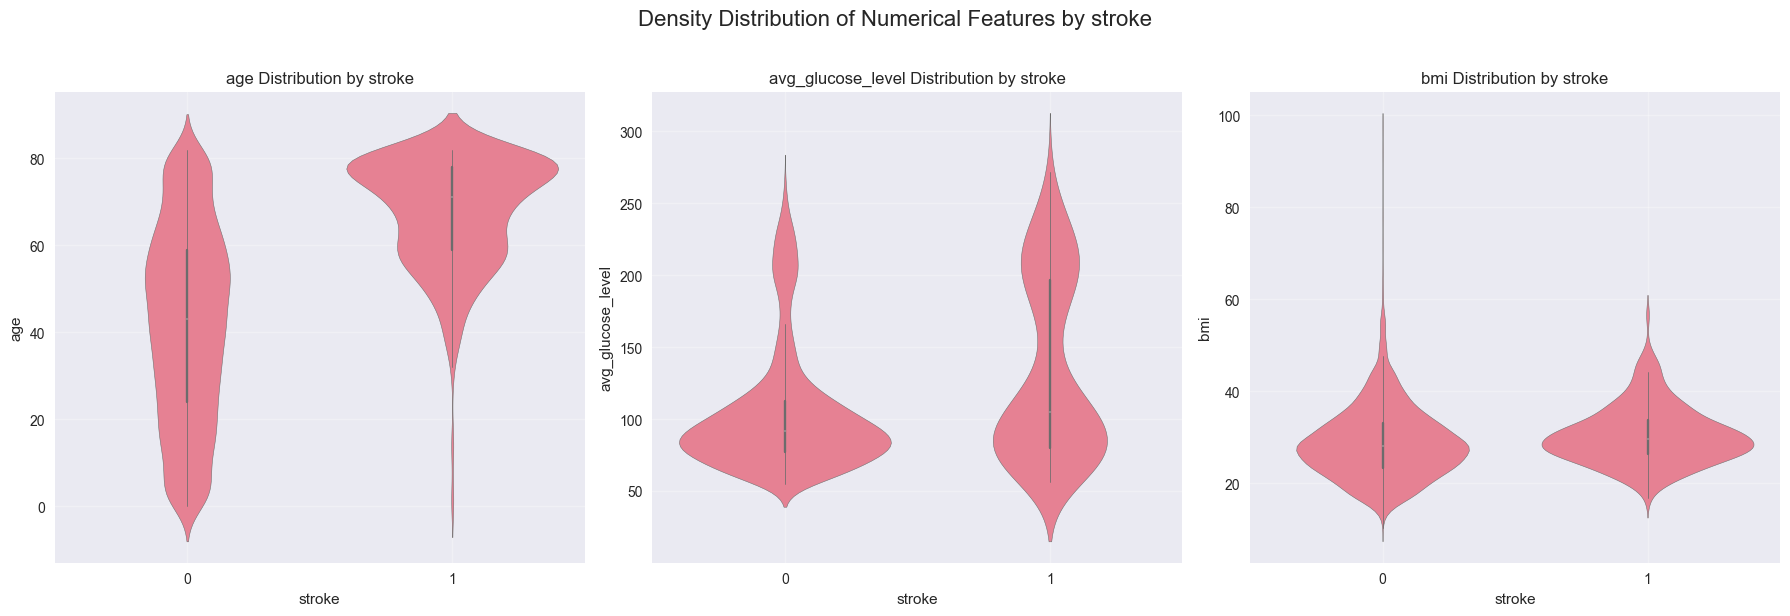

In [43]:
# Violin plots for numerical features (first 6 features)
if target_col and target_col in s_df.columns and 'numerical_features' in locals():
    if numerical_features:
        features_to_plot = numerical_features[:6]
        if features_to_plot:
            n_cols = min(3, len(features_to_plot))
            n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
            if n_rows == 1:
                axes = axes.reshape(1, -1)
            if len(features_to_plot) == 1:
                axes = axes.reshape(1, 1)
            axes = axes.flatten()
            
            for i, feature in enumerate(features_to_plot):
                if i < len(axes):
                    sns.violinplot(data=s_df, x=target_col, y=feature, ax=axes[i])
                    axes[i].set_title(f'{feature} Distribution by {target_col}')
                    axes[i].grid(True, alpha=0.3)
            
            # Hide empty subplots
            for i in range(len(features_to_plot), len(axes)):
                axes[i].set_visible(False)
                
            plt.suptitle(f'Density Distribution of Numerical Features by {target_col}', y=1.02, fontsize=16)
            plt.tight_layout()
            plt.show()

In [44]:
# Statistical significance tests for numerical features
if target_col and target_col in s_df.columns and 'numerical_features' in locals():
    if numerical_features:
        print("Statistical Tests (Mann-Whitney U for non-parametric comparison):")
        for feature in numerical_features:
            # Get unique target values
            target_vals = sorted(s_df[target_col].unique())
            
            if len(target_vals) == 2:
                group_0 = s_df[s_df[target_col] == target_vals[0]][feature].dropna()
                group_1 = s_df[s_df[target_col] == target_vals[1]][feature].dropna()
                
                if len(group_0) > 0 and len(group_1) > 0:
                    # Mann-Whitney U test (non-parametric alternative to t-test)
                    try:
                        statistic, p_value = stats.mannwhitneyu(group_0, group_1, alternative='two-sided')
                        
                        # Effect size (mean difference)
                        mean_0 = group_0.mean()
                        mean_1 = group_1.mean()
                        mean_diff = mean_1 - mean_0
                        
                        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
                        
                        print(f"  - {feature}:")
                        print(f"    Class {target_vals[0]} mean: {mean_0:.3f}, Class {target_vals[1]} mean: {mean_1:.3f}")
                        print(f"    Mean difference: {mean_diff:.3f}")
                        print(f"    p-value: {p_value:.6f} {significance}")
                    except Exception as e:
                        print(f"  - {feature}: Could not perform test ({str(e)})")

Statistical Tests (Mann-Whitney U for non-parametric comparison):
  - age:
    Class 0 mean: 41.972, Class 1 mean: 67.728
    Mean difference: 25.757
    p-value: 0.000000 ***
  - avg_glucose_level:
    Class 0 mean: 104.796, Class 1 mean: 132.545
    Mean difference: 27.749
    p-value: 0.000000 ***
  - bmi:
    Class 0 mean: 28.823, Class 1 mean: 30.471
    Mean difference: 1.648
    p-value: 0.000103 ***


## Outlier Detection

In [45]:
# Get numerical columns for outlier detection
numerical_cols_outliers = s_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target variable from outlier analysis
if target_col and target_col in numerical_cols_outliers:
    numerical_cols_outliers.remove(target_col)

print(f"Detecting outliers in {len(numerical_cols_outliers)} numerical features")
print("Features to analyze:", numerical_cols_outliers)

Detecting outliers in 3 numerical features
Features to analyze: ['age', 'avg_glucose_level', 'bmi']


In [46]:
# Outlier detection functions and summary
if len(numerical_cols_outliers) > 0:
    # Function to detect outliers using IQR method
    def detect_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers, lower_bound, upper_bound
    
    # Function to detect outliers using Z-score method
    def detect_outliers_zscore(df, column, threshold=3):
        z_scores = np.abs(stats.zscore(df[column].dropna()))
        outliers = df[np.abs(stats.zscore(df[column].dropna())) > threshold]
        return outliers
    
    # Outlier summary
    outlier_summary = []
    
    print("OUTLIER DETECTION SUMMARY:")
    print("Method: IQR (Interquartile Range) and Z-Score")
    print("-" * 80)
    print(f"{'Feature':<15} {'Total':<8} {'IQR Outliers':<12} {'Z-Score Outliers':<15} {'% of Data':<10}")
    print("-" * 80)
    
    for col in numerical_cols_outliers:
        # IQR method
        iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(s_df, col)
        iqr_count = len(iqr_outliers)
        
        # Z-score method
        try:
            zscore_outliers = detect_outliers_zscore(s_df, col)
            zscore_count = len(zscore_outliers)
        except:
            zscore_count = 0
        
        total_rows = len(s_df)
        iqr_percentage = (iqr_count / total_rows) * 100
        
        print(f"{col:<15} {total_rows:<8} {iqr_count:<12} {zscore_count:<15} {iqr_percentage:<10.1f}%")
        
        outlier_summary.append({
            'Feature': col,
            'IQR_Outliers': iqr_count,
            'IQR_Percentage': iqr_percentage,
            'ZScore_Outliers': zscore_count,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
    
    print("-" * 80)
else:
    print("No numerical features found for outlier detection.")

OUTLIER DETECTION SUMMARY:
Method: IQR (Interquartile Range) and Z-Score
--------------------------------------------------------------------------------
Feature         Total    IQR Outliers Z-Score Outliers % of Data 
--------------------------------------------------------------------------------
age             5110     0            0               0.0       %
avg_glucose_level 5110     627          49              12.3      %
bmi             5110     110          0               2.2       %
--------------------------------------------------------------------------------


In [47]:
# Detailed outlier information
if len(numerical_cols_outliers) > 0 and 'outlier_summary' in locals():
    print("DETAILED OUTLIER INFORMATION:")
    for i, col in enumerate(numerical_cols_outliers):
        info = outlier_summary[i]
        print(f"\n{col}:")
        print(f"  - IQR Method: {info['IQR_Outliers']} outliers ({info['IQR_Percentage']:.1f}%)")
        print(f"  - Valid range: [{info['Lower_Bound']:.3f}, {info['Upper_Bound']:.3f}]")
        print(f"  - Z-Score Method: {info['ZScore_Outliers']} outliers")
        
        if info['IQR_Outliers'] > 0:
            outliers, _, _ = detect_outliers_iqr(s_df, col)
            unique_outliers = sorted(outliers[col].unique())
            if len(unique_outliers) <= 10:
                print(f"  - Outlier values: {unique_outliers}")
            else:
                print(f"  - Outlier range: [{min(unique_outliers):.3f}, {max(unique_outliers):.3f}] ({len(unique_outliers)} unique values)")

DETAILED OUTLIER INFORMATION:

age:
  - IQR Method: 0 outliers (0.0%)
  - Valid range: [-29.000, 115.000]
  - Z-Score Method: 0 outliers

avg_glucose_level:
  - IQR Method: 627 outliers (12.3%)
  - Valid range: [21.978, 169.358]
  - Z-Score Method: 49 outliers
  - Outlier range: [169.430, 271.740] (605 unique values)

bmi:
  - IQR Method: 110 outliers (2.2%)
  - Valid range: [9.100, 47.500]
  - Z-Score Method: 0 outliers
  - Outlier range: [47.600, 97.600] (74 unique values)


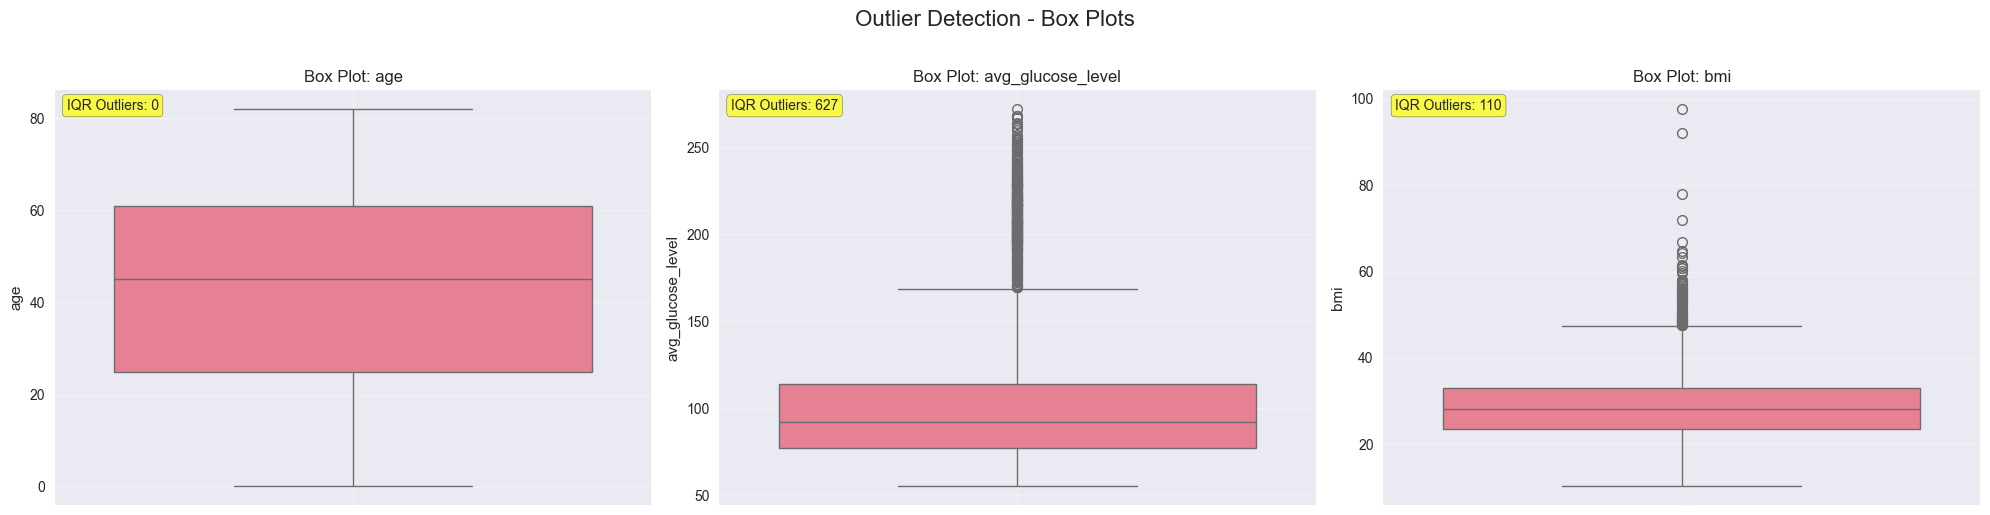

In [48]:
# Box plots with outlier counts
if len(numerical_cols_outliers) > 0 and 'outlier_summary' in locals():
    n_cols = min(4, len(numerical_cols_outliers))
    n_rows = (len(numerical_cols_outliers) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if len(numerical_cols_outliers) == 1:
        axes = axes.reshape(1, 1)
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols_outliers):
        if i < len(axes):
            # Box plot
            sns.boxplot(y=s_df[col], ax=axes[i])
            axes[i].set_title(f'Box Plot: {col}')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
            
            # Add outlier count
            info = outlier_summary[i]
            axes[i].text(0.02, 0.98, f'IQR Outliers: {info["IQR_Outliers"]}', 
                        transform=axes[i].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # Hide empty subplots
    for i in range(len(numerical_cols_outliers), len(axes)):
        axes[i].set_visible(False)
        
    plt.suptitle('Outlier Detection - Box Plots', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

In [50]:
# 8. SUMMARY & FEATURE ENGINEERING RECOMMENDATIONS

print("EDA SUMMARY & FEATURE ENGINEERING RECOMMENDATIONS")
print("=" * 50)

print("DATASET SUMMARY:")
print(f"  - Total samples: {s_df.shape[0]:,}")
print(f"  - Total features: {s_df.shape[1]}")
if target_col:
    print(f"  - Target variable: {target_col}")
else:
    print(f"  - Target variable: Not clearly identified")
    
missing_total = s_df.isnull().sum().sum()
print(f"  - Missing values: {'None' if missing_total == 0 else f'{missing_total:,} total'}")
print(f"  - Duplicate rows: {'None' if s_df.duplicated().sum() == 0 else s_df.duplicated().sum()}")

# Feature types summary
numerical_features = s_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [col for col in s_df.columns if col not in numerical_features]

if target_col and target_col in numerical_features:
    numerical_features.remove(target_col)

print(f"  - Numerical features: {len(numerical_features)}")
print(f"  - Categorical features: {len(categorical_features)}")

# Class balance analysis
if target_col and target_col in s_df.columns:
    target_counts = s_df[target_col].value_counts().sort_index()
    
    print("CLASS BALANCE:")
    for value, count in target_counts.items():
        percentage = (count / len(s_df)) * 100
        print(f"  - Class {value}: {count:,} ({percentage:.1f}%)")
    
    if len(target_counts) == 2:
        minority_class = target_counts.min()
        majority_class = target_counts.max()
        imbalance_ratio = majority_class / minority_class
        print(f"  - Imbalance ratio: {imbalance_ratio:.2f}:1")
        
        if imbalance_ratio > 1.5:
            print(f"  - Dataset shows significant class imbalance!")
            if imbalance_ratio > 10:
                print(f"  - SEVERE IMBALANCE detected - excellent for testing imbalance techniques!")
        else:
            print(f"  - Dataset is relatively balanced")

print("🚀 FEATURE ENGINEERING RECOMMENDATIONS:")
print()

print("1. 📊 PREPROCESSING:")
if missing_total > 0:
    print("  • Handle missing values:")
    missing_cols = s_df.isnull().sum()[s_df.isnull().sum() > 0]
    for col, count in missing_cols.items():
        pct = (count / len(s_df)) * 100
        if s_df[col].dtype == 'object':
            print(f"    - {col}: {count} missing ({pct:.1f}%) - use mode imputation or 'Unknown' category")
        else:
            print(f"    - {col}: {count} missing ({pct:.1f}%) - use median/mean imputation or create missing indicator")
else:
    print("  • ✅ No missing values to handle")

if s_df.duplicated().sum() > 0:
    print(f"  • Remove {s_df.duplicated().sum()} duplicate rows")
else:
    print("  • ✅ No duplicate rows to remove")

if len(numerical_features) > 0:
    print("  • Apply scaling to numerical features:")
    print("    - Use RobustScaler if many outliers detected")
    print("    - Use StandardScaler if outliers are minimal")
    print("    - Consider MinMaxScaler for bounded features")

if len(categorical_features) > 1:  # Excluding target
    categorical_non_target = [col for col in categorical_features if col != target_col]
    if categorical_non_target:
        print(f"  • Encode {len(categorical_non_target)} categorical features:")
        print("    - Use One-Hot Encoding for low cardinality (<10 unique values)")
        print("    - Consider Target Encoding for high cardinality")
        print("    - Use Label Encoding for ordinal features only")
print()

print("2. 🎯 CLASS IMBALANCE HANDLING:")
if target_col and target_col in s_df.columns:
    target_counts = s_df[target_col].value_counts().sort_index()
    if len(target_counts) == 2:
        majority_class = target_counts.max()
        minority_class = target_counts.min()
        imbalance_ratio = majority_class / minority_class
        
        if imbalance_ratio > 1.5:
            print("  ⚠️ CRITICAL: Address severe class imbalance using:")
            print("    - SMOTE (Synthetic Minority Oversampling)")
            print("    - ADASYN (Adaptive Synthetic Sampling)")
            print("    - Random/Tomek undersampling of majority class")
            print("    - Class weights in model training")
            print("    - Ensemble methods (BalancedBagging, EasyEnsemble)")
            print("    - Cost-sensitive learning approaches")
            print("    - Threshold tuning for optimal precision-recall trade-off")
            
            if imbalance_ratio > 10:
                print("  🚨 SEVERE IMBALANCE (>10:1 ratio):")
                print("    - Focus on F1-score, Precision-Recall AUC over Accuracy")
                print("    - Consider advanced techniques like SMOTE-ENN or SMOTE-Tomek")
                print("    - Use stratified sampling for train/validation splits")
                print("    - Consider ensemble of different sampling strategies")
        else:
            print("  ✅ Class balance is acceptable")
            print("    - Standard training approaches should work")
else:
    print("  • Identify and analyze the target variable for classification")
print()

print("3. 🔍 FEATURE SELECTION:")
print("  • Remove highly correlated features (|correlation| > 0.9)")
print("  • Use statistical tests to identify most predictive features:")
print("    - Chi-square test for categorical features")
print("    - Mann-Whitney U test for numerical features")
print("  • Consider feature importance from tree-based models")
print("  • Apply recursive feature elimination (RFE)")
print("  • Use mutual information for feature-target dependency")
print()

print("4. 🔧 ADVANCED FEATURE ENGINEERING:")
print("  • Create interaction features between important variables")
print("  • Apply polynomial features for capturing non-linear relationships")
print("  • Consider binning continuous variables into categorical ranges")
print("  • Create aggregate features (ratios, differences)")
print("  • Generate age groups or BMI categories if applicable")

if len(numerical_features) > 0:
    print("  • Transform skewed numerical features:")
    print("    - Log transformation for right-skewed data")
    print("    - Square root transformation for moderate skew")
    print("    - Box-Cox transformation for optimal normalization")
print()

print("5. 🎪 MODEL SELECTION CONSIDERATIONS:")
print("  • For severe class imbalance:")
print("    - Tree-based models with class weights (Random Forest, XGBoost)")
print("    - Ensemble methods (BalancedBagging, EasyEnsemble)")
print("    - Cost-sensitive SVM")
print("    - Neural networks with focal loss")
print("  • Standard approaches:")
print("    - Logistic Regression with balanced class weights")
print("    - SVM with appropriate kernel and class weights")
print("    - Gradient boosting with scale_pos_weight parameter")
print("  • Use stratified K-fold cross-validation")
print("  • Consider ensemble methods for improved performance")
print()

print("6. ✅ VALIDATION STRATEGY:")
print("  • Use stratified K-fold cross-validation (maintain class distribution)")
print("  • Hold out 20% for final testing with stratification")
print("  • For imbalanced data, focus on:")
print("    - F1-score (harmonic mean of precision and recall)")
print("    - Precision-Recall AUC (better than ROC-AUC for imbalanced data)")
print("    - Recall (sensitivity) for critical minority class detection")
print("    - Specificity for majority class accuracy")
print("  • Use confusion matrices and classification reports")
print("  • Validate feature engineering steps within CV folds")
print()

print("💡 NEXT STEPS FOR IMBALANCED CLASSIFICATION:")
print("  1. Handle missing values and encode categorical features")
print("  2. Split data with stratification to maintain class distribution")
print("  3. Apply class imbalance techniques (SMOTE, undersampling, etc.)")
print("  4. Feature scaling and selection")
print("  5. Train baseline models with class weights")
print("  6. Hyperparameter tuning with appropriate metrics (F1, PR-AUC)")
print("  7. Ensemble different sampling strategies and models")
print("  8. Evaluate with comprehensive metrics on test set")

print("="*50)
print("🎉 EDA COMPLETE! This dataset shows excellent class imbalance for testing ML techniques!")


EDA SUMMARY & FEATURE ENGINEERING RECOMMENDATIONS
DATASET SUMMARY:
  - Total samples: 5,110
  - Total features: 11
  - Target variable: stroke
  - Missing values: 201 total
  - Duplicate rows: None
  - Numerical features: 3
  - Categorical features: 7
CLASS BALANCE:
  - Class 0: 4,861 (95.1%)
  - Class 1: 249 (4.9%)
  - Imbalance ratio: 19.52:1
  - Dataset shows significant class imbalance!
  - SEVERE IMBALANCE detected - excellent for testing imbalance techniques!
🚀 FEATURE ENGINEERING RECOMMENDATIONS:

1. 📊 PREPROCESSING:
  • Handle missing values:
    - bmi: 201 missing (3.9%) - use median/mean imputation or create missing indicator
  • ✅ No duplicate rows to remove
  • Apply scaling to numerical features:
    - Use RobustScaler if many outliers detected
    - Use StandardScaler if outliers are minimal
    - Consider MinMaxScaler for bounded features
  • Encode 7 categorical features:
    - Use One-Hot Encoding for low cardinality (<10 unique values)
    - Consider Target Encoding f